**Decision Trees**

Some of the code is adapted from:
https://github.com/ageron/handson-ml2

# Training and Visualizing a Decision Tree on Two Variables of the iris dataset

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.inspection import DecisionBoundaryDisplay


In [40]:
#Loading the data
iris = load_iris(as_frame=True)
columns_to_use = ["petal length (cm)", "petal width (cm)"]
X_iris = iris.data[columns_to_use].values
y_iris = iris.target

*Split it into a training set and a test set using train_test_split()*

In [41]:
#Take 40% of the data as testing and the remaining 60% as training
"""
Setting random_state to a specific value ensures reproducibility of results. 
When the same value is used across different runs of the code, the same random numbers 
will be generated, leading to consistent outcomes. 
"""
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.4, random_state=42)
print("Training Data", X_train.shape)
print("Testing Data", X_test.shape)  #60 points for testing

Training Data (90, 2)
Testing Data (60, 2)


**Decision tree trained on X_train**

In [42]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
# Accuracy on the training dataset using the score method
print("Training Accuracy:", tree_clf.score(X_train, y_train))

Training Accuracy: 0.9888888888888889


**Making Prediction**

In [43]:
y_pred = tree_clf.predict(X_test)
print("Predicted Labels:", y_pred[:20]) #Predicted labels the testing points
print("True Labels:     ", y_test[:20]) #True labels
print("Training Accuracy:", metrics.accuracy_score(tree_clf.predict(X_train), y_train))
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Predicted Labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2]
True Labels:      73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
Name: target, dtype: int32
Training Accuracy: 0.9888888888888889
Testing Accuracy: 0.9833333333333333


[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


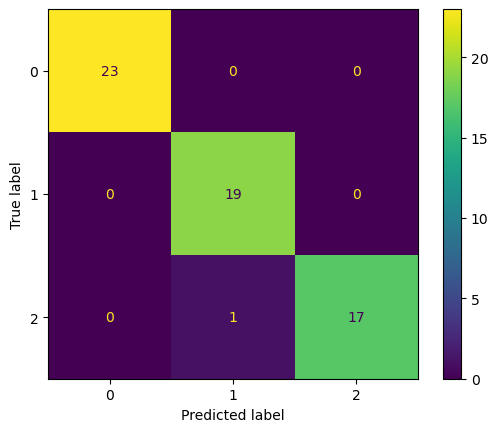

In [44]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()
plt.show()

**Different training sets result in different models**

In [45]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.4)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.9166666666666666
Testing Accuracy: 0.9666666666666667
Testing Accuracy: 0.9833333333333333
Testing Accuracy: 0.9
Testing Accuracy: 0.95
Testing Accuracy: 0.9333333333333333
Testing Accuracy: 0.9333333333333333
Testing Accuracy: 0.95
Testing Accuracy: 0.9833333333333333
Testing Accuracy: 0.9666666666666667


## Cross Validation
**Every single point is used for testing once**

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_clf, X_iris, y_iris, cv=5)
print(scores)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.96666667 0.96666667 0.9        0.96666667 1.        ]
0.96 accuracy with a standard deviation of 0.03


In [47]:
#10 fold cross validation. Each time
scores = cross_val_score(tree_clf, X_iris, y_iris, cv=10)
print(scores.round(2))

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[1.   0.93 1.   0.93 0.93 0.8  0.93 0.93 1.   1.  ]
0.95 accuracy with a standard deviation of 0.06


### Overfitting

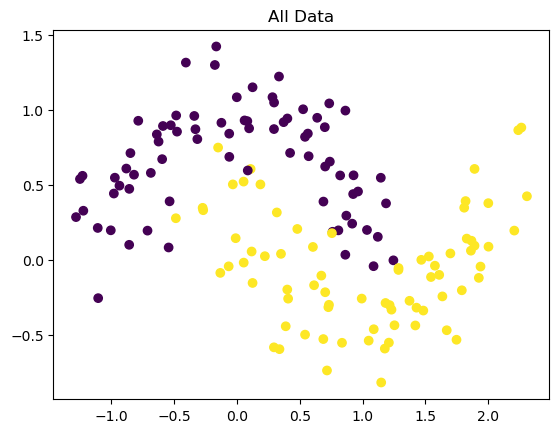

In [48]:
# Generate data with some noise
# A simple toy dataset to visualize clustering and classification algorithms
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)
plt.scatter(X_moons[:,0], X_moons[:,1],c=y_moons)
plt.title("All Data")
plt.show()

In [49]:
X_moons_train = X_moons  
y_moons_train = y_moons


tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
tree_clf1.fit(X_moons_train, y_moons_train)
tree_clf2.fit(X_moons_train, y_moons_train)


DecisionTreeClassifier(min_samples_leaf=3, random_state=42)

In [50]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
print(tree_clf1.score(X_moons_test, y_moons_test))
print(tree_clf2.score(X_moons_test, y_moons_test))

0.898
0.902


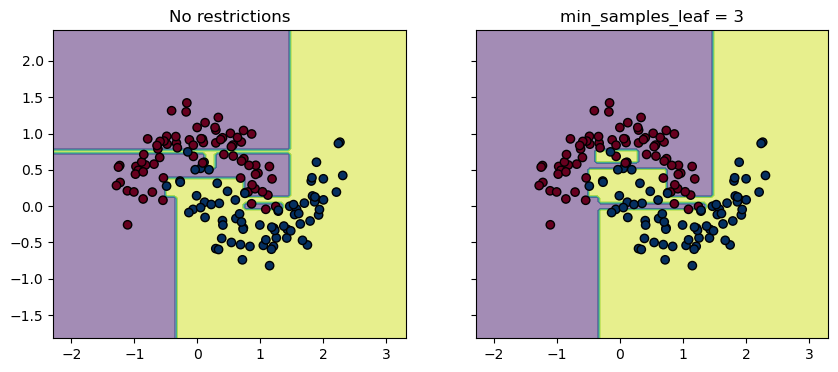

In [51]:
cmap="Wistia"
colors = ["#0000FF", "#FF0000"]
markers = ["o", "^"]

palette = ["tab:blue", "tab:green", "tab:orange"]

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plt.title("No restrictions")
disp = DecisionBoundaryDisplay.from_estimator(
    tree_clf1, X_moons, response_method="predict",
    alpha=0.5, ax=axes[0]
)

disp.ax_.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap = "RdBu", edgecolor="k")

"""for idx in (0, 1):
    plt.plot(X_moons[:, 0][y_moons == idx], X_moons[:, 1][y_moons == idx],
                color=colors[idx], marker=markers[idx], linestyle="none")"""
    
plt.sca(axes[1])
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
disp = DecisionBoundaryDisplay.from_estimator(
    tree_clf2, X_moons, response_method="predict",
    alpha=0.5, ax=axes[1]
)

disp.ax_.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap = "RdBu", edgecolor="k")

plt.show()

### Having more data helps


In [52]:
for ns in range(20,200,20):
    print("Number of data points:",ns)
    X_train, y_train = make_moons(n_samples=ns, noise=0.2, random_state=42)
    tree_clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
    tree_clf.fit(X_train, y_train)
    print("Accuracy:",tree_clf.score(X_test, y_test))

Number of data points: 20
Accuracy: 0.03333333333333333
Number of data points: 40
Accuracy: 0.0
Number of data points: 60
Accuracy: 0.21666666666666667
Number of data points: 80
Accuracy: 0.31666666666666665
Number of data points: 100
Accuracy: 0.4666666666666667
Number of data points: 120
Accuracy: 0.0
Number of data points: 140
Accuracy: 0.3333333333333333
Number of data points: 160
Accuracy: 0.31666666666666665
Number of data points: 180
Accuracy: 0.55


### Underfitting 
#### Having more training data does not help if we restrict the model (e.g., training a tree of one level: one question only)

In [53]:
# Generate data raning from 1000 to 5000. Split into training and testing.
# Build a decision tree of one node only
for i in range(1,6):
    X_moons_train, y_moons_train = make_moons(n_samples=1000*i, noise=0.3, random_state=42)
    X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons, y_moons, test_size=0.5)
    tree_clf = DecisionTreeClassifier(max_depth=1,random_state=42) 
    tree_clf.fit(X_moons_train, y_moons_train)
    print("Training Dataset", 1000*i/2, print("Testing Dataset", 1000*i/2))
    print("Training Accuracy", tree_clf.score(X_moons_train, y_moons_train))
    print("Testing Accuracy", tree_clf.score(X_moons_test, y_moons_test))


Testing Dataset 500.0
Training Dataset 500.0 None
Training Accuracy 0.88
Testing Accuracy 0.7866666666666666
Testing Dataset 1000.0
Training Dataset 1000.0 None
Training Accuracy 0.88
Testing Accuracy 0.7866666666666666
Testing Dataset 1500.0
Training Dataset 1500.0 None
Training Accuracy 0.8266666666666667
Testing Accuracy 0.84
Testing Dataset 2000.0
Training Dataset 2000.0 None
Training Accuracy 0.88
Testing Accuracy 0.7866666666666666
Testing Dataset 2500.0
Training Dataset 2500.0 None
Training Accuracy 0.8933333333333333
Testing Accuracy 0.76


###  Grid search with cross-validation to find good hyperparameter values
### We can try different decision tree models with different parameters using the GridSearchCV from sklearn
### It chooses the parameters that give the best performance

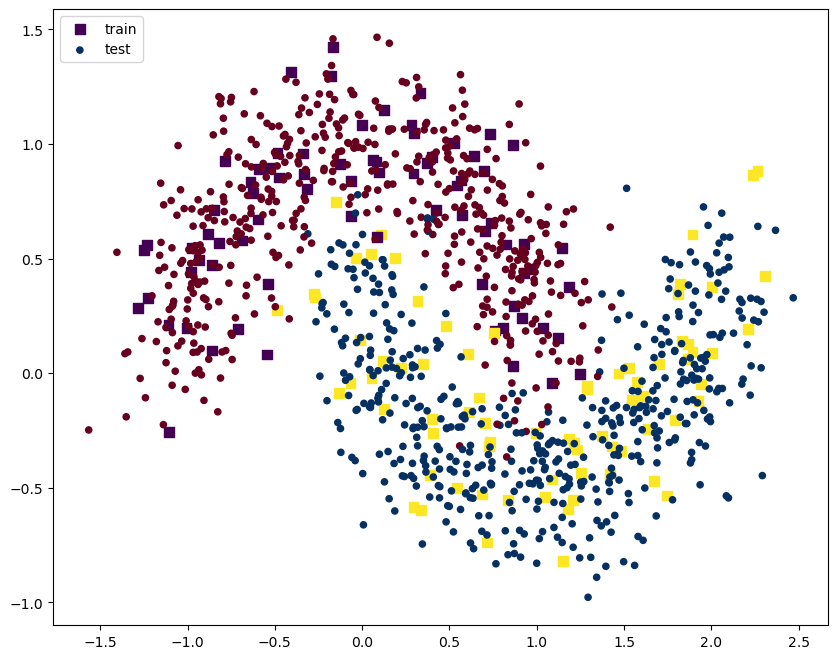

In [54]:
X_train, y_train = make_moons(n_samples=150, noise=0.2, random_state=42)
X_test, y_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
ax1.scatter(X_train[:,0], X_train[:,1], s=50, c=y_train, marker="s", label='train')
ax1.scatter(X_test[:,0], X_test[:,1], s=20, c=y_test, cmap = "RdBu", marker="o", label='test')
plt.legend(loc='upper left')
plt.show()

In [55]:
#First try the default parameters for decision tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
print("Accuracy:",tree_clf.score(X_test, y_test))

Accuracy: 0.898


Scikit-learn library to perform hyperparameter tuning on a Decision Tree Classifier model using Grid Search Cross Validation (GridSearchCV).

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
params = {
    'max_leaf_nodes': list(range(2, 50)),
    'max_depth': list(range(2, 8)),
    'min_samples_split': [2, 3, 4]
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3)

grid_search_cv.fit(X_train, y_train)

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.922

In [57]:
tree_clf = grid_search_cv.best_estimator_
print("criterion:", tree_clf.criterion) #'gini', 'entropy'
print("max_leaf_nodes:", tree_clf.max_leaf_nodes)
print("max_depth:", tree_clf.max_depth)
print("min_samples_split:", tree_clf.min_samples_split)

criterion: gini
max_leaf_nodes: 8
max_depth: 6
min_samples_split: 2
